In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
class TrainingDigit(object):
    """a handwritten digit from the MNIST training set"""

    def __init__(self, raw_string):
        """we feed this a single line from the MNIST data set"""
        self.raw_string = raw_string

        # make the data range from 0.01 to 1.00
        _tmp = raw_string.split(",")
        self.scaled = np.asfarray(_tmp[1:])/255.0 * 0.99 + 0.01
        
        # the correct answer
        self.num = int(_tmp[0])
        
        # the output for the NN as a bit array
        self.out = np.zeros((10))
        self.out[self.num] = 1
        
    def plot(self):
        plt.imshow(self.scaled.reshape((28,28)), cmap="Greys", interpolation="nearest")

In [28]:
class TrainingSet(object):
    """read the next digit from the training set csv file and return a
    TrainingDigit object"""
    
    def __init__(self):
        self.f = open("mnist_train.csv", "r")
        
    def get_next(self):
        return TrainingDigit(self.f.readline())
    
    def close(self):
        # show implement a context manager
        self.f.close()

In [29]:
tset = TrainingSet()

In [30]:
d = tset.get_next()
d.num

'5'

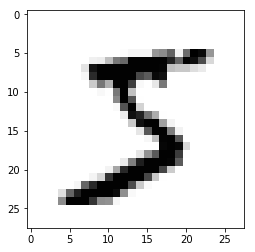

In [31]:
d.plot()

In [32]:
d = tset.get_next()
d.num

'0'

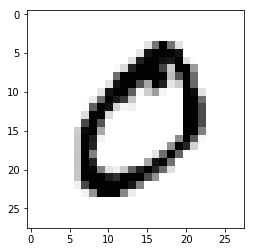

In [33]:
d.plot()

In [35]:
tset.close()

In [43]:
class UnknownDigit(TrainingDigit):
    """this is like the TrainingDigit, but we will have a method that
    takes the output and compares to the right answer"""
    def __init__(self, raw_string):
        super().__init__(raw_string)
        self.out = None
        
    def check_output(out):
        guess = np.argmax(out)
        return guess == self.num

In [44]:
class TestSet(object):
    """read the next digit from the test set csv file and return a
    UnknownDigit object"""
    
    def __init__(self):
        self.f = open("mnist_test.csv", "r")
        
    def get_next(self):
        return UnknownDigit(self.f.readline())
    
    def close(self):
        # show implement a context manager
        self.f.close()

In [45]:
test = TestSet()

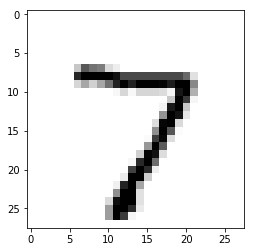

In [46]:
test.get_next().plot()